<a href="https://colab.research.google.com/github/praaatik/pytorch/blob/main/food_101_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import zipfile
from pathlib import Path
import os
import random
from PIL import Image

import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.xkcd()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [3]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Directories -> {len(dirnames)}, Images -> {len(filenames)} in {dirpath}.")

In [4]:
walk_through_dir(image_path)

Directories -> 2, Images -> 0 in data/pizza_steak_sushi.
Directories -> 3, Images -> 0 in data/pizza_steak_sushi/train.
Directories -> 0, Images -> 75 in data/pizza_steak_sushi/train/steak.
Directories -> 0, Images -> 78 in data/pizza_steak_sushi/train/pizza.
Directories -> 0, Images -> 72 in data/pizza_steak_sushi/train/sushi.
Directories -> 3, Images -> 0 in data/pizza_steak_sushi/test.
Directories -> 0, Images -> 19 in data/pizza_steak_sushi/test/steak.
Directories -> 0, Images -> 25 in data/pizza_steak_sushi/test/pizza.
Directories -> 0, Images -> 31 in data/pizza_steak_sushi/test/sushi.


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [6]:
print(train_dir, test_dir, sep="\n")

data/pizza_steak_sushi/train
data/pizza_steak_sushi/test


Random image path: data/pizza_steak_sushi/train/sushi/1551817.jpg
Image class: sushi
Image height: 384
Image width: 512


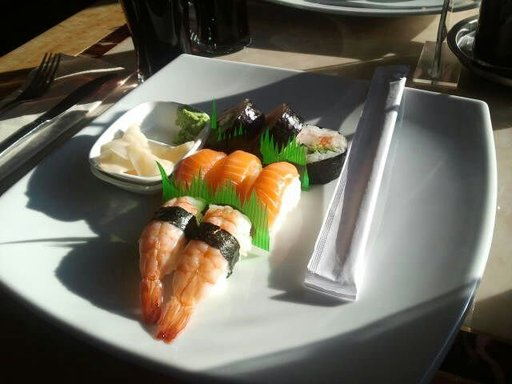

In [7]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

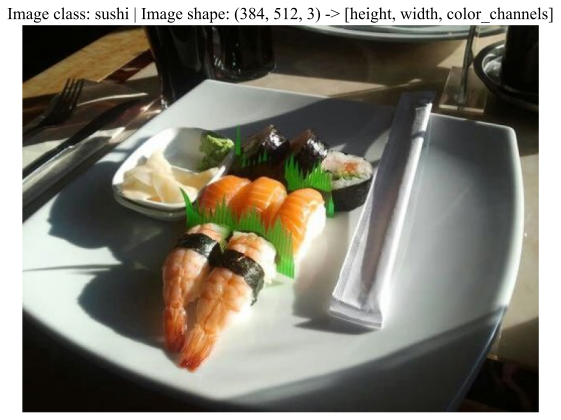

In [8]:
img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [9]:
img_as_array.shape

(384, 512, 3)

In [16]:
data_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor()
])

[PosixPath('data/pizza_steak_sushi/train/steak/1382427.jpg')]


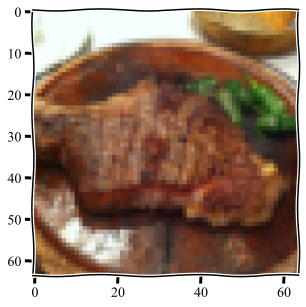

In [11]:
random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.sample(image_path_list, k=1)
print(random_image_path)

with Image.open('data/pizza_steak_sushi/train/steak/1382427.jpg') as f:
  f1 = data_transforms(f).permute(1, 2, 0)
  plt.imshow(f1)
  plt.show()

In [12]:
random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.sample(image_path_list, k=1)
print(random_image_path)

with Image.open('data/pizza_steak_sushi/train/steak/1382427.jpg') as f:
  t = data_transforms(f)
  print(t.size())
  print(f.size)

  # plt.imshow(f)
  # plt.show()

[PosixPath('data/pizza_steak_sushi/train/steak/1382427.jpg')]
torch.Size([3, 64, 64])
(512, 512)


In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)

      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")

      transformed_image = data_transforms(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.size()}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

# plot_transformed_images(image)

In [14]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list)

[PosixPath('data/pizza_steak_sushi/train/steak/1264154.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/1257104.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2324994.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/176508.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3518960.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/1849463.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/461689.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2825100.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2603058.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2222018.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/3142045.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2087958.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/167069.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/234626.jpg'), PosixPath('data/pizza_steak

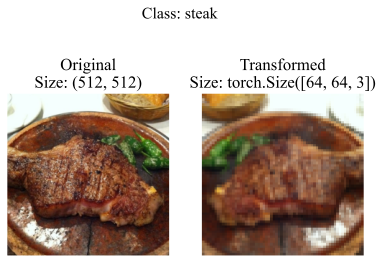

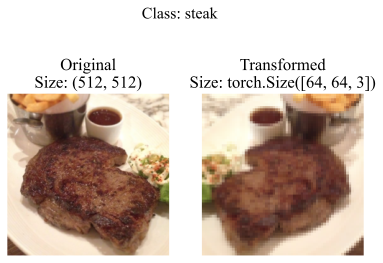

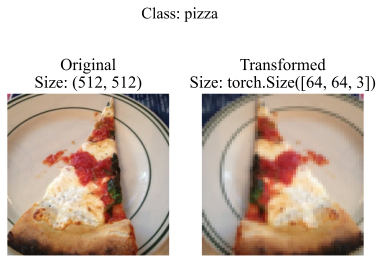

In [17]:
plot_transformed_images(image_paths=image_path_list, transform=data_transforms,n=3)